In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings 
warnings.filterwarnings('ignore')

In [10]:
#df = pd.read_csv("C:\\Users\\Public\\Documents\\K-Means\\BankData\\DataSet1.csv")
df = pd.read_excel("C:\\Users\\PRACHI PANDEY\\Desktop\\Main_DataSet1.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
X = df.iloc[:,[0,5]].values
X[X < 0] = df['balance'].mean()

In [12]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX=scaler.fit_transform(X)'

In [13]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

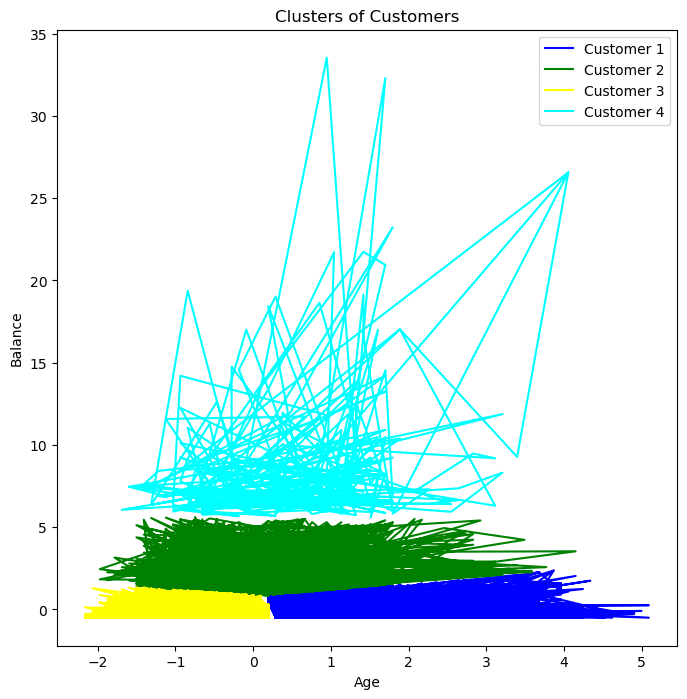

In [16]:
plt.figure(figsize=(8,8))
#plt.scatter(X[:,0], X[:,1], s=100,  c=y_kmeans,cmap='viridis',marker='*')
#centroids = kmeansmodel.cluster_centers_
#plt.scatter(centroids[:,0], centroids[:,1], s=200, color='black', label='Centroids',alpha=0.5)

plt.plot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], color="blue", label="Customer 1")
plt.plot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], color="green", label="Customer 2")
plt.plot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], color="yellow", label="Customer 3")
plt.plot(X[y_kmeans == 3,0], X[y_kmeans == 3,1], color="cyan", label="Customer 4")


plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

For n_clusters = 2, silhouette score is 0.4811869871174317
For n_clusters = 3, silhouette score is 0.5112587996718049
For n_clusters = 4, silhouette score is 0.5238321346074999


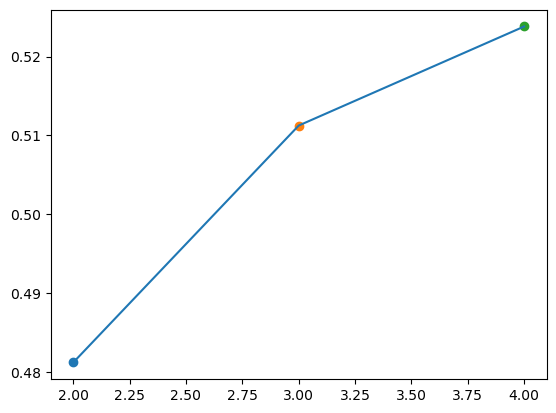

In [15]:
score=[]
i=0
range_n_clusters = [2,3,4,5]
for n_clusters in range(2,5):
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    y_kmeans = clusterer.fit_predict(X)
    score.append(silhouette_score(X,y_kmeans))
    s = score[i]
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, s))

    #plt.line(n_clusters)
    plt.scatter(n_clusters,score[i])
    i=i+1
plt.plot(range(2,5),score)
plt.show() 